Import Libraries

In [96]:
!pip install seaborn

In [97]:
import os
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
warnings.filterwarnings('ignore')

Hypothesis
1. Most of the population lives in rural areas
2. Most of the impoverished population lives in rural areas

Import Population Dataset and explore

In [100]:
df = pd.read_csv('C:\\Users\\seven\\Downloads\\SSA_area_population.csv')
df.head(5)

,iso3,region,GID_1,population,latitude,longitude,geometry,area
0,GMB,Banjul,GMB.1.1_1,23756,13.4533,-16.5891,POLYGON ((-16.60180473327631 13.46569538116449...,6.296196
1,GMB,Banjul,GMB.1.2_1,324638,13.4484,-16.6583,MULTIPOLYGON (((-16.66708374023432 13.48958301...,65.316698
2,GMB,Lower River,GMB.2.1_1,10195,13.4177,-15.4166,POLYGON ((-15.34407138824457 13.43496131896973...,164.347603
3,GMB,Lower River,GMB.2.2_1,19187,13.4541,-15.2683,POLYGON ((-15.24063491821289 13.40646553039562...,202.198495
4,GMB,Lower River,GMB.2.3_1,27581,13.4342,-15.5451,POLYGON ((-15.51589965820307 13.39194774627691...,183.206223


In [101]:
df = df.drop(columns = ['geometry', 'latitude', 'longitude'])
df.head(5)

,iso3,region,GID_1,population,area
0,GMB,Banjul,GMB.1.1_1,23756,6.296196
1,GMB,Banjul,GMB.1.2_1,324638,65.316698
2,GMB,Lower River,GMB.2.1_1,10195,164.347603
3,GMB,Lower River,GMB.2.2_1,19187,202.198495
4,GMB,Lower River,GMB.2.3_1,27581,183.206223


In [102]:
pop_df = df
pop_df.head(5)

,iso3,region,GID_1,population,area
0,GMB,Banjul,GMB.1.1_1,23756,6.296196
1,GMB,Banjul,GMB.1.2_1,324638,65.316698
2,GMB,Lower River,GMB.2.1_1,10195,164.347603
3,GMB,Lower River,GMB.2.2_1,19187,202.198495
4,GMB,Lower River,GMB.2.3_1,27581,183.206223


Create Population Density column

In [104]:
pop_df['population_density_sqkm'] = pop_df['population'] / pop_df['area']
pop_df.head(5)

,iso3,region,GID_1,population,area,population_density_sqkm
0,GMB,Banjul,GMB.1.1_1,23756,6.296196,3773.072072
1,GMB,Banjul,GMB.1.2_1,324638,65.316698,4970.214536
2,GMB,Lower River,GMB.2.1_1,10195,164.347603,62.033153
3,GMB,Lower River,GMB.2.2_1,19187,202.198495,94.891903
4,GMB,Lower River,GMB.2.3_1,27581,183.206223,150.546196


In [105]:
def population_decile(population_density_sqkm):
    """
    This is a function that classifies
    the declie of an area given the
    population density.

    Parameters
    ----------
    pop_density_sqkm : float
        Population density of the geotype

    Returns
    -------
    decile : string
        Population decile category of the area.
    """
    if population_density_sqkm >= 700:
        decile = 'Decile 1 \n(>700)'
    elif population_density_sqkm >= 600 and population_density_sqkm <700:
        decile = 'Decile 2 \n(600-700)'
    elif population_density_sqkm >= 500 and population_density_sqkm <600:
        decile = 'Decile 3 \n(500-600)'
    elif population_density_sqkm >= 400 and population_density_sqkm <500:
        decile = 'Decile 4 \n(400-500)'
    elif population_density_sqkm >= 300 and population_density_sqkm <400:
        decile = 'Decile 5 \n(300-400)'
    elif population_density_sqkm >= 200 and population_density_sqkm <300:
        decile = 'Decile 6 \n(200-300)'
    elif population_density_sqkm >= 100 and population_density_sqkm <200:
        decile = 'Decile 7 \n(100-200)'
    elif population_density_sqkm >= 75 and population_density_sqkm <100:
        decile = 'Decile 8 \n(75-100)'
    elif population_density_sqkm >= 50 and population_density_sqkm<75:
        decile = 'Decile 9 \n(50-75)'
    else:
        decile = 'Decile 10 \n(<50)'
    return decile

Test definition

In [107]:
population_decile(201)

'Decile 6 \n(200-300)'

Create column

In [117]:
pop_df['decile'] = ''
pop_df

,iso3,region,GID_1,population,area,population_density_sqkm,decile
0,GMB,Banjul,GMB.1.1_1,23756,6.296196,3773.072072,
1,GMB,Banjul,GMB.1.2_1,324638,65.316698,4970.214536,
2,GMB,Lower River,GMB.2.1_1,10195,164.347603,62.033153,
3,GMB,Lower River,GMB.2.2_1,19187,202.198495,94.891903,
4,GMB,Lower River,GMB.2.3_1,27581,183.206223,150.546196,
...,...,...,...,...,...,...,...
3886,ZMB,Western,ZMB.10.3_1,137451,17961.955810,7.652340,
3887,ZMB,Western,ZMB.10.4_1,211131,10504.778400,20.098568,
3888,ZMB,Western,ZMB.10.5_1,144466,15030.214750,9.611706,
3889,ZMB,Western,ZMB.10.6_1,125610,30013.778730,4.185078,


In [119]:
for i in range(len(pop_df)):
    pop_df['decile'].loc[i] = population_decile(pop_df['population_density_sqkm'].loc[i])

In [120]:
pop_df.head(5)

,iso3,region,GID_1,population,area,population_density_sqkm,decile
0,GMB,Banjul,GMB.1.1_1,23756,6.296196,3773.072072,Decile 1 \n(>700)
1,GMB,Banjul,GMB.1.2_1,324638,65.316698,4970.214536,Decile 1 \n(>700)
2,GMB,Lower River,GMB.2.1_1,10195,164.347603,62.033153,Decile 9 \n(50-75)
3,GMB,Lower River,GMB.2.2_1,19187,202.198495,94.891903,Decile 8 \n(75-100)
4,GMB,Lower River,GMB.2.3_1,27581,183.206223,150.546196,Decile 7 \n(100-200)


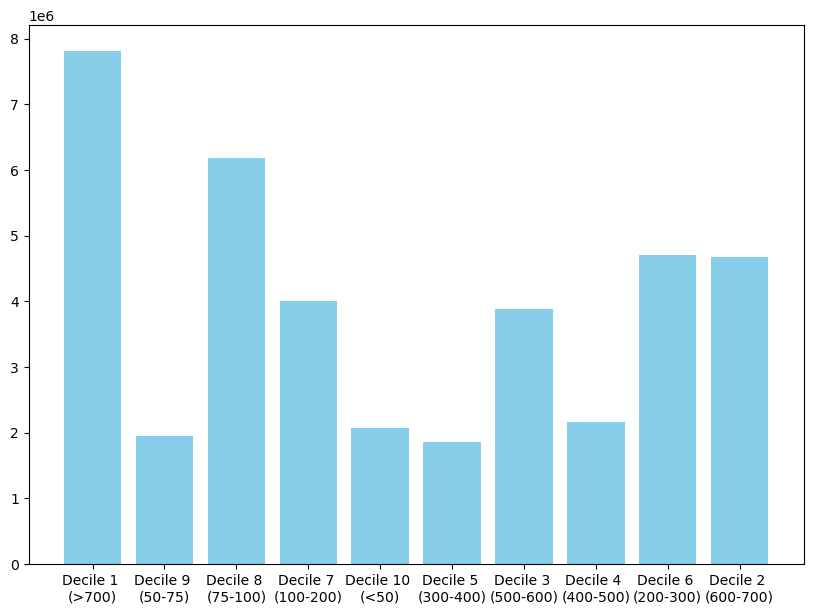

In [129]:
plt.figure(figsize = (10, 7))
plt.bar(pop_df['decile'],pop_df['population'], color = 'skyblue')
plt.show()

Hypothesis 1. Cannot confidently conclude that the majority of the population lives in rural areas

Import and join secondary dataset

In [135]:
pov_df = pd.read_csv('C:\\Users\\seven\\Downloads\\SSA_poverty_results.csv')
pov_df.head(5)

,GID_1,poverty_range,poverty_rate
0,AGO.1.1_1,GSAP2_po_1,70.586667
1,AGO.1.1_1,GSAP2_po_2,87.660000
2,AGO.1.1_1,GSAP2_poor,49.370000
3,AGO.1.2_1,GSAP2_po_1,61.320000
4,AGO.1.2_1,GSAP2_po_2,83.775000


In [137]:
df = pd.merge(pop_df, pov_df, on = 'GID_1', how = 'inner')
df.head(5)

,iso3,region,GID_1,population,area,population_density_sqkm,decile,poverty_range,poverty_rate
0,GMB,Banjul,GMB.1.1_1,23756,6.296196,3773.072072,Decile 1 \n(>700),GSAP2_po_1,4.940000
1,GMB,Banjul,GMB.1.1_1,23756,6.296196,3773.072072,Decile 1 \n(>700),GSAP2_po_2,36.135000
2,GMB,Banjul,GMB.1.1_1,23756,6.296196,3773.072072,Decile 1 \n(>700),GSAP2_poor,0.105000
3,GMB,Banjul,GMB.1.2_1,324638,65.316698,4970.214536,Decile 1 \n(>700),GSAP2_po_1,15.570000
4,GMB,Banjul,GMB.1.2_1,324638,65.316698,4970.214536,Decile 1 \n(>700),GSAP2_po_2,48.116667


Caluculate the population that is impoverished based on the poverty rate percentage

In [142]:
df['impoverished'] = round((df['poverty_rate'] / 100) * df['population'])
df.head(5)

,iso3,region,GID_1,population,area,population_density_sqkm,decile,poverty_range,poverty_rate,impoverished
0,GMB,Banjul,GMB.1.1_1,23756,6.296196,3773.072072,Decile 1 \n(>700),GSAP2_po_1,4.940000,1174.0
1,GMB,Banjul,GMB.1.1_1,23756,6.296196,3773.072072,Decile 1 \n(>700),GSAP2_po_2,36.135000,8584.0
2,GMB,Banjul,GMB.1.1_1,23756,6.296196,3773.072072,Decile 1 \n(>700),GSAP2_poor,0.105000,25.0
3,GMB,Banjul,GMB.1.2_1,324638,65.316698,4970.214536,Decile 1 \n(>700),GSAP2_po_1,15.570000,50546.0
4,GMB,Banjul,GMB.1.2_1,324638,65.316698,4970.214536,Decile 1 \n(>700),GSAP2_po_2,48.116667,156205.0


Adjust poverty_range column

In [147]:
df['poverty_threshold'] = ''

In [149]:
for i in range(len(df)):
    if df['poverty_range'].loc[i] == 'GSAP2_poor':
        df['poverty_threshold'].loc[i] = '$1.90'
    elif df['poverty_range'].loc[i] == 'GSAP2_po_1':
        df['poverty_threshold'].loc[i] = '$3.20'
    else:
        df['poverty_threshold'].loc[i] = '$5.50'
    

In [151]:
df.head(5)

,iso3,region,GID_1,population,area,population_density_sqkm,decile,poverty_range,poverty_rate,impoverished,poverty_threshold
0,GMB,Banjul,GMB.1.1_1,23756,6.296196,3773.072072,Decile 1 \n(>700),GSAP2_po_1,4.940000,1174.0,$3.20
1,GMB,Banjul,GMB.1.1_1,23756,6.296196,3773.072072,Decile 1 \n(>700),GSAP2_po_2,36.135000,8584.0,$5.50
2,GMB,Banjul,GMB.1.1_1,23756,6.296196,3773.072072,Decile 1 \n(>700),GSAP2_poor,0.105000,25.0,$1.90
3,GMB,Banjul,GMB.1.2_1,324638,65.316698,4970.214536,Decile 1 \n(>700),GSAP2_po_1,15.570000,50546.0,$3.20
4,GMB,Banjul,GMB.1.2_1,324638,65.316698,4970.214536,Decile 1 \n(>700),GSAP2_po_2,48.116667,156205.0,$5.50


Stakced plots

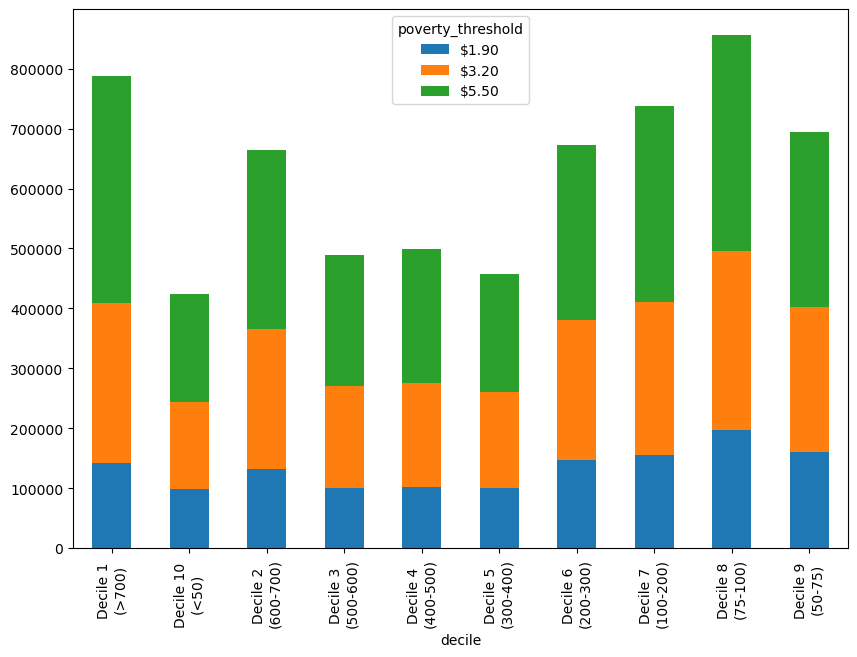

In [175]:
pivot_df = df.pivot_table(values = 'impoverished', index = 'decile', columns = 'poverty_threshold', aggfunc = 'mean')
fig, ax = plt.subplots(figsize = (10, 7))
pivot_df.plot(kind = 'bar', stacked = True, ax = ax)
plt.show()

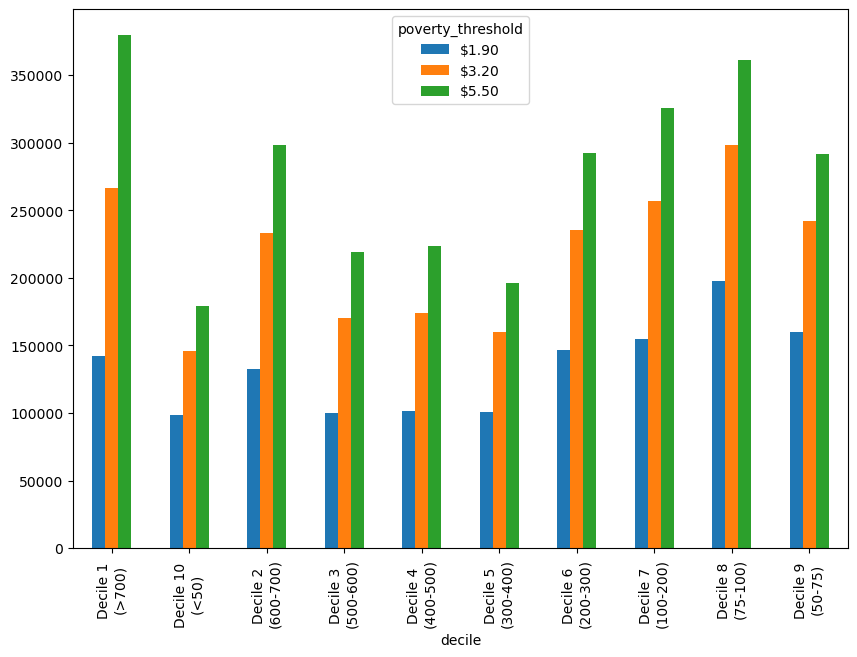

In [177]:
pivot_df = df.pivot_table(values = 'impoverished', index = 'decile', columns = 'poverty_threshold', aggfunc = 'mean')
fig, ax = plt.subplots(figsize = (10, 7))
pivot_df.plot(kind = 'bar', stacked = False, ax = ax)
plt.show()

Create column showing percentage of people living below the poverty line

In [173]:
df['relative_pop'] = ((df['impoverished'] / df['population']) * 100)
df.head(5)

,iso3,region,GID_1,population,area,population_density_sqkm,decile,poverty_range,poverty_rate,impoverished,poverty_threshold,relative_pop
0,GMB,Banjul,GMB.1.1_1,23756,6.296196,3773.072072,Decile 1 \n(>700),GSAP2_po_1,4.940000,1174.0,$3.20,4.941909
1,GMB,Banjul,GMB.1.1_1,23756,6.296196,3773.072072,Decile 1 \n(>700),GSAP2_po_2,36.135000,8584.0,$5.50,36.134029
2,GMB,Banjul,GMB.1.1_1,23756,6.296196,3773.072072,Decile 1 \n(>700),GSAP2_poor,0.105000,25.0,$1.90,0.105237
3,GMB,Banjul,GMB.1.2_1,324638,65.316698,4970.214536,Decile 1 \n(>700),GSAP2_po_1,15.570000,50546.0,$3.20,15.569958
4,GMB,Banjul,GMB.1.2_1,324638,65.316698,4970.214536,Decile 1 \n(>700),GSAP2_po_2,48.116667,156205.0,$5.50,48.116671


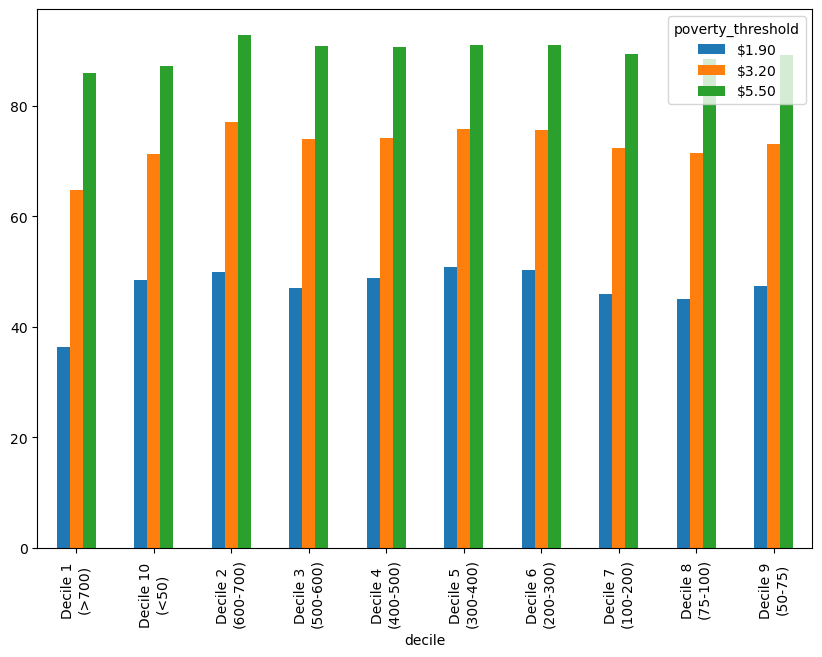

In [179]:
pivot_rt = df.pivot_table(values = 'relative_pop', index = 'decile', columns = 'poverty_threshold', aggfunc = 'mean')
fig, ax = plt.subplots(figsize = (10, 7))
pivot_rt.plot(kind = 'bar', stacked = False, ax = ax)
plt.show()

Hypothesis 2. Most of the impoverished population are living in sparsely populated areas, however, the percentage of population
below the poverty line, shows a normal distribution with less people living below line densly and sparsely populated areas.